<a href="https://colab.research.google.com/github/LaouaMERiLO/Variational_Denoising_and_Inpainting_Autoencoders/blob/main/AutoEncoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [ ]:
import numpy as np
import random
from tqdm import tqdm
from keras.layers import Input, Conv2D
from keras.layers import AveragePooling2D, BatchNormalization
from keras.layers import UpSampling2D, Flatten, Activation,MaxPooling2D,layers
from keras.models import Model, Sequential
from keras.layers.core import Dense, Dropout
from keras.layers import LeakyReLU
from keras.optimizers import Adam
from keras import backend as k
import keras
import tensorflow as tf
from keras import layers
from keras.datasets import mnist
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# Load Data

In [ ]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))



# ***AUTOENCODERS***
Autoencoding is much like what it sounds in the sense that the input and 'output' are essentially the same. It is a form of unsupervised learning, specifically utilized for tasks like dimensionality reduction, feature learning, and data compression. In autoencoding, data compression involves learning functions for both compression and decompression from the provided data. The architecture of an autoencoder is structured to encode input data into a lower-dimensional representation and subsequently decode it back to its original form. The primary objective is to minimize the reconstruction error during this process.

a breakdown of the components and functioning of an autoencoder:

- `Encoder` : The encoder is the first part of the autoencoder. It takes the input data and transforms it into a lower-dimensional representation. The encoder typically consists of one or more hidden layers that perform transformations on the input data, gradually reducing its dimensionality.

- `Latent Space` :The latent space is a compressed representation of the input data, which captures the most important features or patterns. It is a lower-dimensional space compared to the original input data. The goal of the encoder is to learn an efficient encoding that captures relevant information.

- `Decoder` : The decoder is the second part of the autoencoder. It takes the encoded representation from the latent space and reconstructs the original input data from it. Similar to the encoder, the decoder typically consists of one or more hidden layers that gradually expand the dimensionality of the encoded representation.

- `Reconstruction Loss` : The autoencoder aims to minimize the difference between the original input data and the reconstructed output from the decoder. This is achieved by defining a loss function, often a distance metric such as mean squared error (MSE) or binary cross-entropy, which quantifies the difference between the input and the reconstructed output.

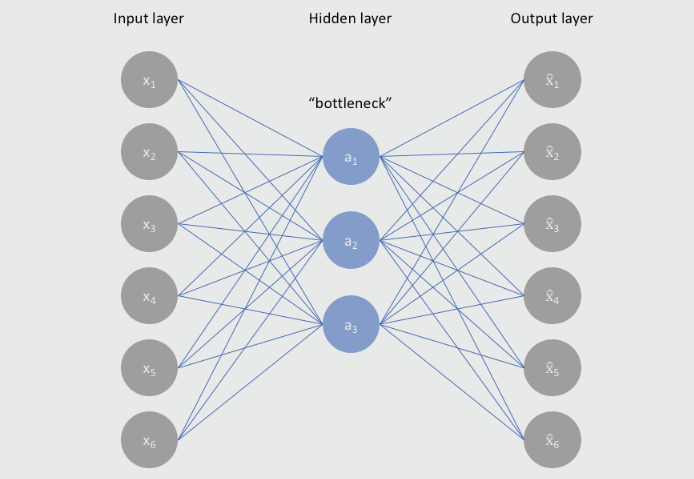

# **In this notebook, we will explore various common types of autoencoders, including Denoising Autoencoders, Variational Autoencoders, Deblurring Autoencoders, and Inpainting Autoencoders.**

# Denoising, debluring and Inpaining Autoencoders







*   **Denoising Autoencoder:**
A Denoising Autoencoder is a type of autoencoder designed to remove noise from input data. It is trained to map noisy or corrupted input data to their clean counterparts. By learning to reconstruct the original data from noisy samples, denoising autoencoders can capture useful features and patterns while ignoring the noise.

*   **Deblurring Autoencoder:**
A Deblurring Autoencoder is designed to remove blur or distortion from images. It learns to map blurred images to their sharp, clear counterparts. Deblurring autoencoders are useful for image restoration tasks, enhancing the quality of images that have been affected by motion blur, defocus, or other forms of distortion.

*   **Inpainting Autoencoder:**
An Inpainting Autoencoder is used for image completion and restoration. It learns to predict corrupted or `missing parts of an image`, effectively "filling in" the missing information. Inpainting autoencoders have applications in image editing, object removal, and image generation.






## Noicy function

In [ ]:

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

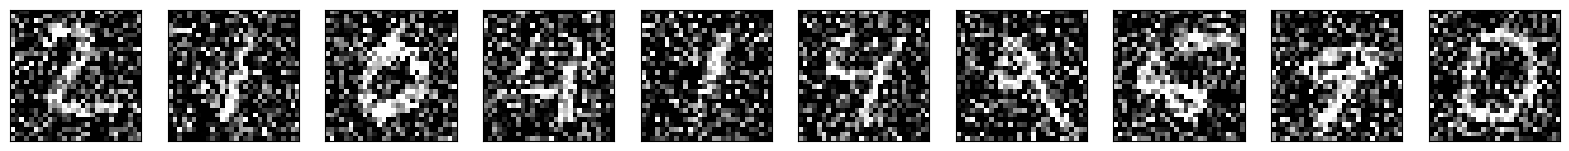

In [ ]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


## blurring function

In [ ]:
def add_blur(X):
    result = []
    for img in X:
        blury = cv2.GaussianBlur(img, (5, 5), 0)
        blury = np.clip(blury, 0, 1)
        result.append(blury)
    return np.array(result)

In [ ]:
blur_train = add_blur(x_train)
blur_test = add_blur(x_test)

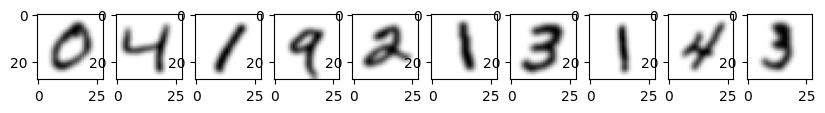

In [ ]:
n = 10
plt.figure(figsize=(10, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(blur_train[i], cmap=plt.cm.binary)

## Inpaining Function


In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import numpy as np

def add_squares(image, num_squares, square_size):
    image_with_squares = image.copy()

    for _ in range(num_squares):
        # Generate random positions for the squares within the valid range
        row = np.random.randint(0, image.shape[0] - square_size)
        col = np.random.randint(0, image.shape[1] - square_size)

        # Color the square in black
        image_with_squares[row:row+square_size, col:col+square_size] = 0

    return image_with_squares

# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))


# Define the number of squares and their size
num_squares = 5
square_size = 5




In [ ]:
paint_train = np.array([add_squares(image, num_squares, square_size) for image in x_train])
paint_test = np.array([add_squares(image, num_squares, square_size) for image in x_test])


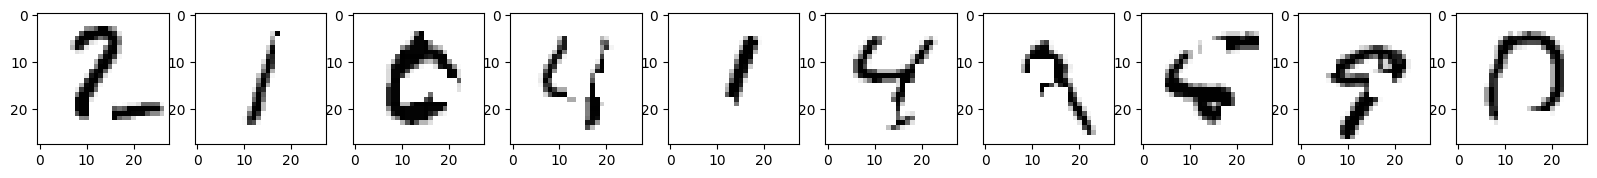

In [ ]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(paint_test[i], cmap=plt.cm.binary)

# Build the Autoencoder Model

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D


input_img = Input(shape=(28, 28, 1))
conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)

# Decoder
conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
up1 = UpSampling2D((2, 2))(conv4)
conv5 = Conv2D(64, (3, 3), activation='relu', padding='same')(up1)
up2 = UpSampling2D((2, 2))(conv5)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2)
autoencoder = keras.Model(input_img, decoded)



In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         73856 

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Training the model



In [ ]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Epoch 1/10
469/469 [==============================] - 21s 14ms/step - loss: 0.1417 - val_loss: 0.1046
Epoch 2/10
469/469 [==============================] - 5s 11ms/step - loss: 0.1029 - val_loss: 0.0991
Epoch 3/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0990 - val_loss: 0.0972
Epoch 4/10
469/469 [==============================] - 5s 12ms/step - loss: 0.0970 - val_loss: 0.0955
Epoch 5/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0956 - val_loss: 0.0947
Epoch 6/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0946 - val_loss: 0.0938
Epoch 7/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0939 - val_loss: 0.0933
Epoch 8/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0932 - val_loss: 0.0927
Epoch 9/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0926 - val_loss: 0.0936
Epoch 10/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0922 - val_l

In [ ]:
from keras.callbacks import TensorBoard

autoencoder.fit(blur_train, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(blur_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Epoch 1/10
469/469 [==============================] - 18s 13ms/step - loss: 0.1022 - val_loss: 0.0732
Epoch 2/10
469/469 [==============================] - 5s 12ms/step - loss: 0.0717 - val_loss: 0.0692
Epoch 3/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0691 - val_loss: 0.0679
Epoch 4/10
469/469 [==============================] - 6s 14ms/step - loss: 0.0679 - val_loss: 0.0670
Epoch 5/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0671 - val_loss: 0.0662
Epoch 6/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0665 - val_loss: 0.0659
Epoch 7/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0661 - val_loss: 0.0653
Epoch 8/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0657 - val_loss: 0.0650
Epoch 9/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0655 - val_loss: 0.0648
Epoch 10/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0652 - val_l

In [ ]:
from keras.callbacks import TensorBoard

autoencoder.fit(paint_train, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(paint_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Epoch 1/10
469/469 [==============================] - 21s 14ms/step - loss: 0.1292 - val_loss: 0.0944
Epoch 2/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0913 - val_loss: 0.0877
Epoch 3/10
469/469 [==============================] - 5s 12ms/step - loss: 0.0864 - val_loss: 0.0841
Epoch 4/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0837 - val_loss: 0.0822
Epoch 5/10
469/469 [==============================] - 5s 12ms/step - loss: 0.0819 - val_loss: 0.0807
Epoch 6/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0806 - val_loss: 0.0800
Epoch 7/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0795 - val_loss: 0.0790
Epoch 8/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0786 - val_loss: 0.0783
Epoch 9/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0780 - val_loss: 0.0780
Epoch 10/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0773 - val_l

# Predictions Denoising, debluring and Inpaining

313/313 [==============================] - 2s 4ms/step


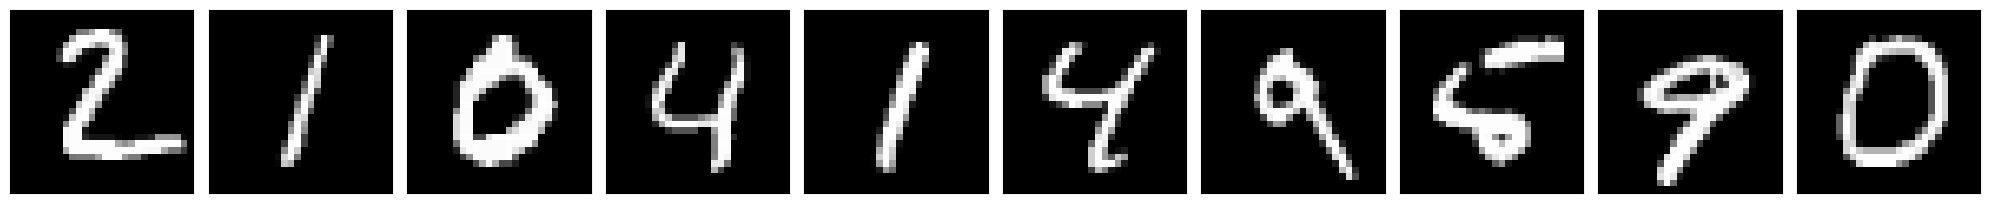

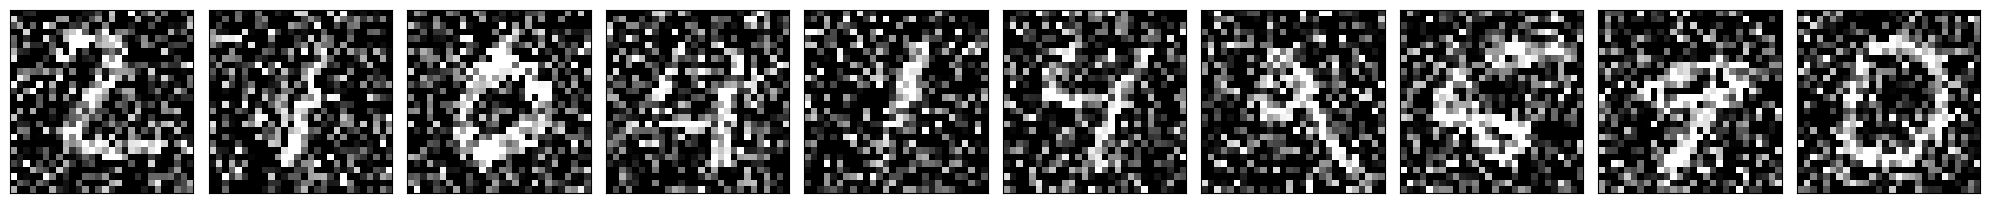

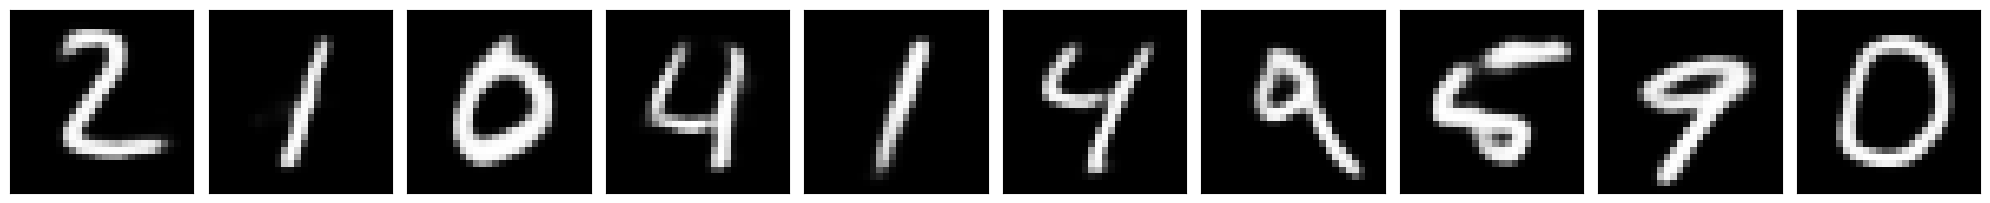

In [ ]:
decoded_imgs_noisy = autoencoder.predict(x_test_noisy)
n = 10

# Figure for original images
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_label('Original')

plt.tight_layout()
plt.show()

# Figure for noisy images
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_label('Noisy')

plt.tight_layout()
plt.show()

# Figure for reconstructed images
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(decoded_imgs_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_label('Reconstructed')

plt.tight_layout()
plt.show()


313/313 [==============================] - 1s 3ms/step


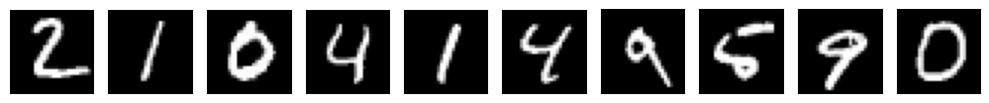

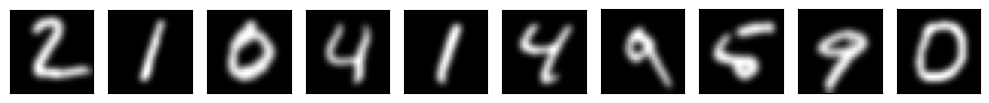

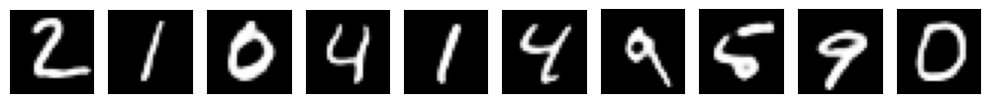

In [ ]:
decoded_blur = autoencoder.predict(blur_test)
n = 10

# Figure for original images
plt.figure(figsize=(10, 4))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_label('Original')

plt.tight_layout()
plt.show()

# Figure for noisy images
plt.figure(figsize=(10, 4))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(blur_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_label('blurred')

plt.tight_layout()
plt.show()

# Figure for reconstructed images
plt.figure(figsize=(10, 4))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(decoded_blur[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_label('Reconstructed')

plt.tight_layout()
plt.show()


313/313 [==============================] - 1s 2ms/step


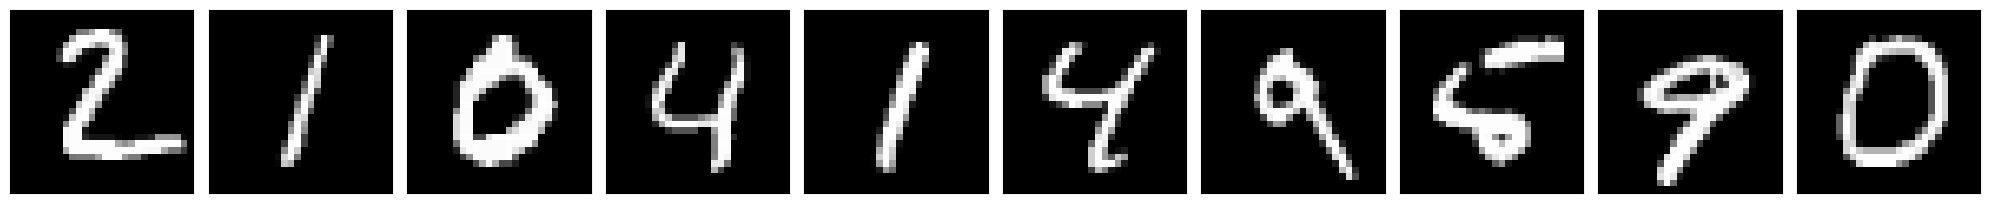

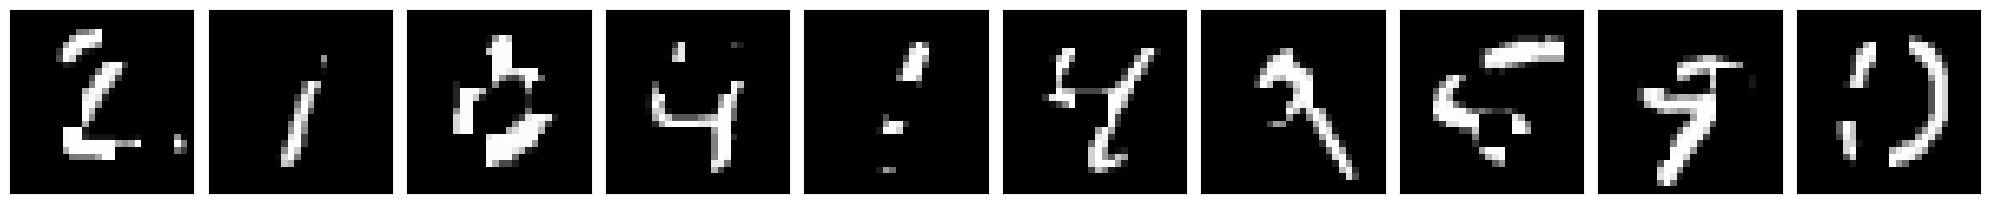

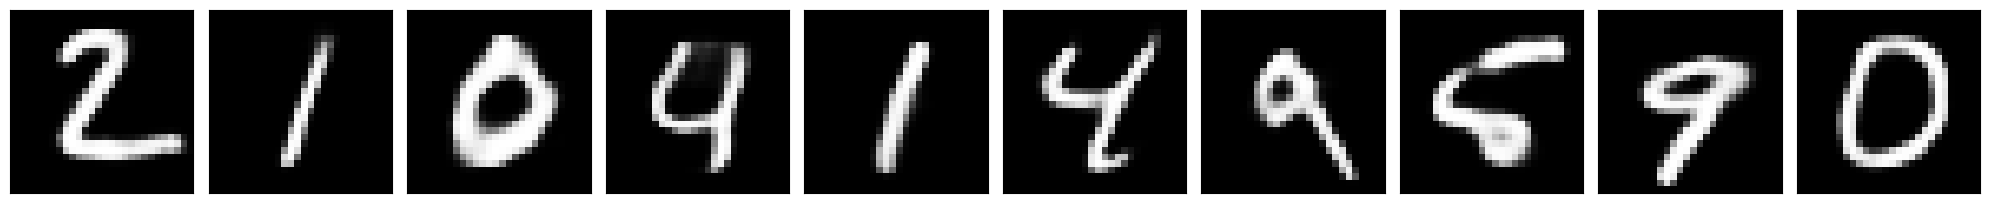

In [ ]:
decoded_paint = autoencoder.predict(paint_test)
n = 10

# Figure for original images
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_label('Original')

plt.tight_layout()
plt.show()

# Figure for noisy images
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(paint_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_label('Noisy')

plt.tight_layout()
plt.show()

# Figure for reconstructed images
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(decoded_paint[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_label('Reconstructed')

plt.tight_layout()
plt.show()


# **Variational Autoencoder**


VAE is an unsupervised latent variable model, which is used to learn a deep representation from high dimensional data. The basic idea
of VAE is encoding the input x as a probability distribution z rather than a point encoding in conventional AE. VAE then uses a decoder network to reconstruct the original input by using samples from z




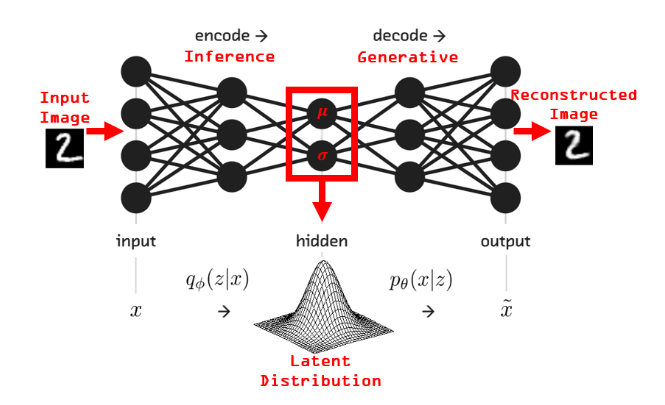

## latent space in Variational Autoencoder



* Instead of mapping the input to a fixed latent vector, we map it to a Gaussian normal distribution.
* Instead of passing the output of the encoder to the decoder, we pass the mean and standard deviation of the distribution.
* We approximate the learned distribution to the underlying Gaussian distribution using Kullback-Leibler (KL) divergence. This is achieved by incorporating a KL divergence term in the loss function during training, which forced  the learned distribution to match a standard Gaussian distribution.
* Additionally, the reconstruction in this notebook is the binary_crossentropy loss function. As a result, we are minimizing both the difference between the learned distribution and the Gaussian distribution through Kullback-Leibler divergence, as well as the reconstruction error.
* By leveraging the mean and standard deviation, we sample the latent vector and perform backpropagation with respect to it.


## KL divergence

we define KL divergence term in the loss function as:

$$
KL(Q_j(z|x) || P(z)) = -0.5 * Σ(1 + log(σ^2) - μ^2 - σ^2)
$$

Where:
- μ is the mean of the learned distribution (encoded latent space values)
- σ is the standard deviation (square root of variance) of the learned distribution
- Σ represents the sum over all dimensions of the latent space


## Total loss fucntion

The formula for the total loss function in the context of the Variational Autoencoder (VAE) is given by:

$$
loss = \mathcal{L}(\mathbf{x}, \mathbf{x'}) + KL(Q_j(z|x) || N(0,1))
$$

where :

$\mathcal{L}(\mathbf{x}, \mathbf{x'})$ represents the reconstruction loss, which measures the difference between the input data $\mathbf{x}$ and the reconstructed data $\mathbf{x'}$. It is computed using the binary cross-entropy loss formula:

$\mathcal{L}(\mathbf{x}, \mathbf{x'}) = -\frac{1}{N} \sum_{i=1}^{N} [y_i \cdot \log(p_i) + (1 - y_i) \cdot \log(1 - p_i)]$





## Backpropagation

*  In order to enable backpropagation with respect to the sampled latent vector, we utilize the following equation


$
\mathbf{z} = \mathbf{\mu} + \mathbf{\sigma} \odot \mathbf{\epsilon}
$

Here  
$\epsilon $ standert normal distribution $\epsilon \sim \mathcal{N}(0, 1) $


and $\mathbf{\mu}$ and $\mathbf{\sigma}$ are the learned parameter


In [ ]:
BATCH_SIZE = 128
LEARNING_RATE = 1e-3
NUM_EPOCHS = 20

In [ ]:
class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon


In [ ]:
class Encoder(layers.Layer):
    """Maps MNIST digits to a triplet (z_mean, z_log_var, z)."""
    def __init__(
        self,
        input_size,
        filters,
        kernel_sizes,
        strides,
        z_dim = 2,
        use_batch_norm=True,
        use_dropout=True,
        **kwargs
    ):
        super().__init__(**kwargs)
        encoder_input = layers.Input(shape=input_size, name='encoder_input')

        x = encoder_input

        n_laysers_decoder = len(filters)
        for i in range(n_laysers_decoder):
            conv_layer = layers.Conv2D(
                filters=filters[i],
                kernel_size=kernel_sizes[i],
                strides=strides[i],
                padding='same',
                name=f'encoder_conv_{i}')

            x = conv_layer(x)

            if use_batch_norm:
                x = layers.BatchNormalization()(x)

            x = layers.LeakyReLU()(x)

            if use_dropout:
                x = layers.Dropout(rate=0.25)(x)

        self.flattening_shape = keras.backend.int_shape(x)[1:]
        x = layers.Flatten(name='encoder_flatten')(x)

        z_mean = layers.Dense(z_dim, name='z_mean')(x)
        z_log_var = layers.Dense(z_dim, name='z_log_var')(x)

        z = Sampling(name='sampling')([z_mean, z_log_var])
        self.encoder = Model(encoder_input, (z_mean, z_log_var, z), name='encoder')

    def call(self, inputs):
        return self.encoder(inputs)


In [ ]:
class Decoder(layers.Layer):
    """Converts z, the encoded digit vector, back into a readable digit."""
    def __init__(
        self,
        filters,
        kernel_sizes,
        strides,
        flattening_shape,
        z_dim = 2,
        **kwargs
    ):
        super().__init__(**kwargs)
        decoder_input = layers.Input(shape=(z_dim,), name='decoder_input')

        x = layers.Dense(units=np.prod(flattening_shape))(decoder_input)
        x = layers.Reshape(flattening_shape)(x)

        n_laysers_decoder = len(filters)
        for i in range(n_laysers_decoder):
            conv_transpose_layer = layers.Conv2DTranspose(
                filters=filters[i],
                kernel_size=kernel_sizes[i],
                strides=strides[i],
                padding='same',
                name=f'decoder_transpose_conv_{i}')

            x = conv_transpose_layer(x)

            if i < n_laysers_decoder - 1:
                x = layers.LeakyReLU()(x)
            else:
                x = layers.Activation('sigmoid')(x)

        decoder_output = x
        self.decoder = Model(decoder_input, decoder_output, name='decoder')

    def call(self, inputs):
        return self.decoder(inputs)


In [ ]:
class VAE(keras.Model):
    def __init__(self, encoder, decoder, alpha, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.alpha = alpha
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker
        ]

    def train_step(self, data):
        x, y = data
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(x)
            y_pred = self.decoder(z)

            r_loss = tf.reduce_mean(tf.reduce_sum(
                keras.losses.binary_crossentropy(y, y_pred), axis=(1, 2)
            ))

            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))

            total_loss = self.alpha * r_loss + (1-self.alpha)*kl_loss

            gradients = tape.gradient(total_loss, self.trainable_weights)
            self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))

        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(r_loss)
        self.kl_loss_tracker.update_state(kl_loss)

        return {
            "loss": self.total_loss_tracker.result(),
            "r_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

In [ ]:
z_dim = 2

encoder = Encoder(
    input_size=(28, 28, 1),
    filters=[32, 64, 64, 64],
    kernel_sizes=[3, 3, 3, 3],
    strides=[1, 2, 2, 1],
    z_dim=z_dim,
    use_batch_norm=True,
    use_dropout=True)

decoder = Decoder(
    filters=[64, 64, 32, 1],
    kernel_sizes=[3, 3, 3, 3],
    strides=[1, 2, 2, 1],
    flattening_shape=encoder.flattening_shape,
    z_dim=z_dim)

In [ ]:
vae = VAE(encoder, decoder, alpha=0.7)

callback = tf.keras.callbacks.EarlyStopping(
    monitor='loss',
    patience=5)

vae.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    loss = tf.keras.losses.MeanSquaredError())

vae.fit(
    x = x_train,
    y = x_train,
    batch_size=BATCH_SIZE,
    epochs=NUM_EPOCHS,
    shuffle=True,
    callbacks=[callback]);

Epoch 1/20
469/469 [==============================] - 12s 14ms/step - loss: 164.5826 - r_loss: 232.7878 - kl_loss: 5.4013
Epoch 2/20
469/469 [==============================] - 7s 14ms/step - loss: 114.3586 - r_loss: 160.9076 - kl_loss: 5.8146
Epoch 3/20
469/469 [==============================] - 6s 14ms/step - loss: 110.8614 - r_loss: 155.7817 - kl_loss: 6.1167
Epoch 4/20
469/469 [==============================] - 7s 14ms/step - loss: 108.6671 - r_loss: 152.5434 - kl_loss: 6.3155
Epoch 5/20
469/469 [==============================] - 6s 14ms/step - loss: 107.7090 - r_loss: 151.1388 - kl_loss: 6.4144
Epoch 6/20
469/469 [==============================] - 7s 14ms/step - loss: 106.5100 - r_loss: 149.3826 - kl_loss: 6.5044
Epoch 7/20
469/469 [==============================] - 6s 14ms/step - loss: 106.0634 - r_loss: 148.6944 - kl_loss: 6.5922
Epoch 8/20
469/469 [==============================] - 7s 14ms/step - loss: 105.3203 - r_loss: 147.6161 - kl_loss: 6.6392
Epoch 9/20
469/469 [===========

# Predictions of Variational Autoencoder

In [ ]:
z_mean, z_log_var, z = vae.encoder(x_test)
decoded_x = vae.decoder(z).numpy()

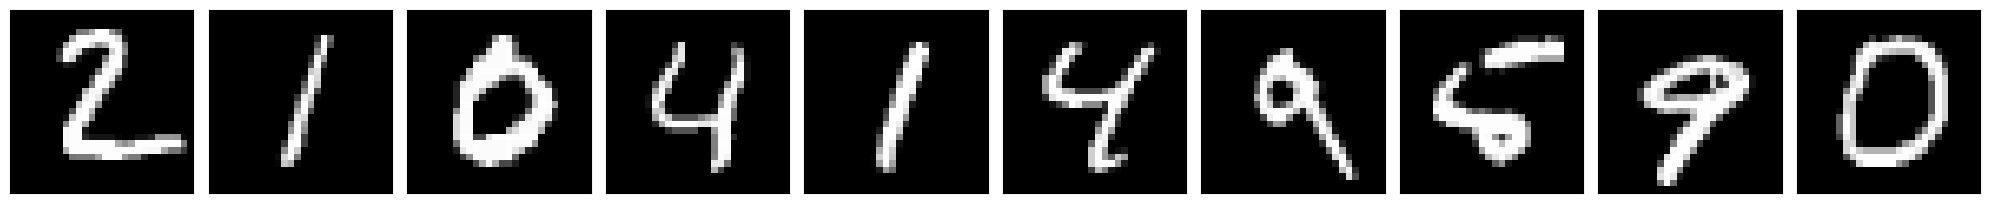

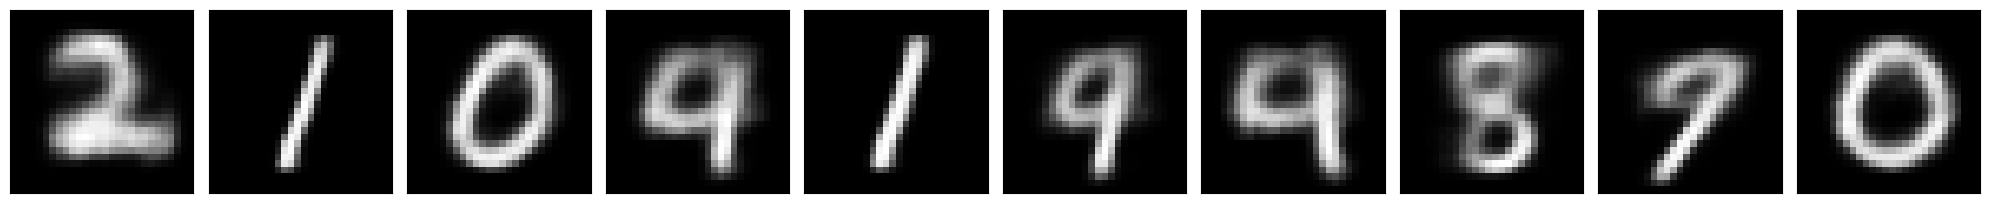

In [ ]:
#decoded_x = vae.predict(x_test)
n = 10

# Figure for original images
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_label('Original')

plt.tight_layout()
plt.show()



# Figure for reconstructed images
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(decoded_x[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_label('Reconstructed')

plt.tight_layout()
plt.show()
